# Análise do consumo de cimento nos últimos 30 anos 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
ANO_INICIAL = 1991
ANO_FINAL = 2019

In [7]:
# path="../dados/anualizados/csv/"
path="/content/drive/MyDrive/TCC/dados/anualizados/csv/"

anos = [str(i) for i in range(1991, 2020)]
meses = ["{:02d}".format(i) for i in range(1,13)] # colocamos os 0 a esquerda se precisar
anomes =  ["199012"] 
n_estados = 27

for ano in anos:
  anomes += [str(ano) + i for i in meses]

estados = ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
  'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
  'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba',
  'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
  'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
  'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

norte = [0,2,3,13,20,21]
nordeste = [1,4,5,9,14,15,16,19,24,26]
centro = [6,8,11,12]
sudeste = [7,10,18,25]
sul = [17,22,23]

In [8]:
consumo = pd.read_csv(path+"consumo.csv")
consumo.head()
consumo = consumo.drop(axis=1, labels="199012")

In [9]:
consumo_anual = pd.DataFrame(list(consumo["Estado"]), columns=["Estado"])

In [10]:
for i in range(29):

    consumo_anual[anos[i]] = consumo.iloc[:,1+i*12:13+i*12].sum(1)

In [11]:
anual = consumo_anual.transpose()
anual.columns = anual.iloc[0]
anual = anual.iloc[1:]

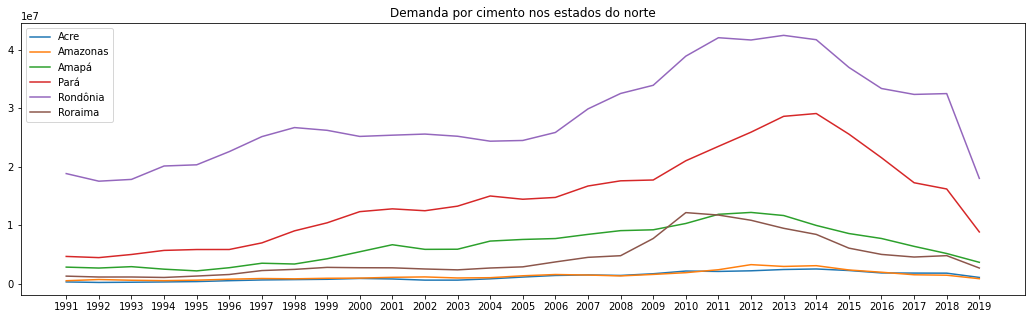

In [12]:
plt.figure(figsize=(18,5))
plt.title("Demanda por cimento nos estados do norte")

for i in range(len(norte)):

    plt.plot(anual[estados[norte[i]]], label=estados[norte[i]])

plt.legend()
plt.show()

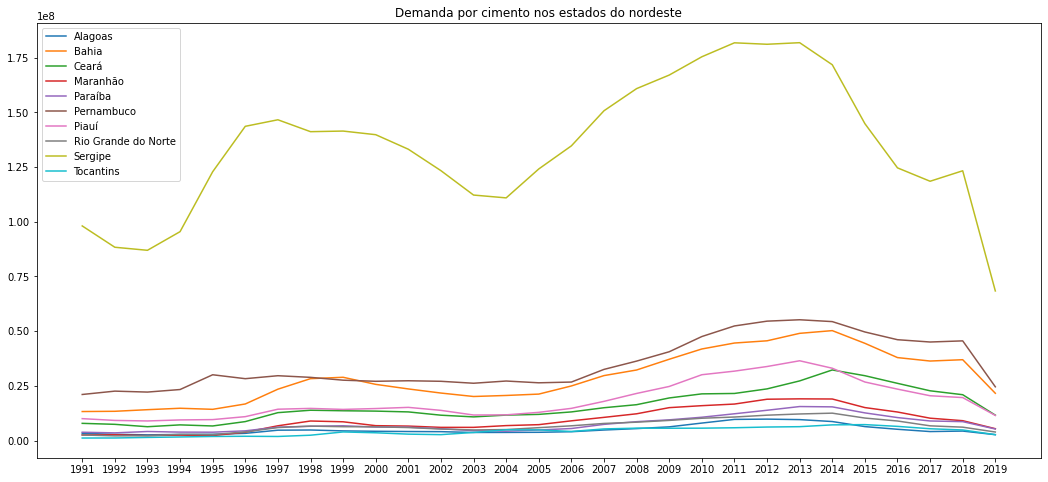

In [13]:
plt.figure(figsize=(18,8))
plt.title("Demanda por cimento nos estados do nordeste")

for i in range(len(nordeste)):

    plt.plot(anual[estados[nordeste[i]]], label=estados[nordeste[i]])

plt.legend()
plt.show()

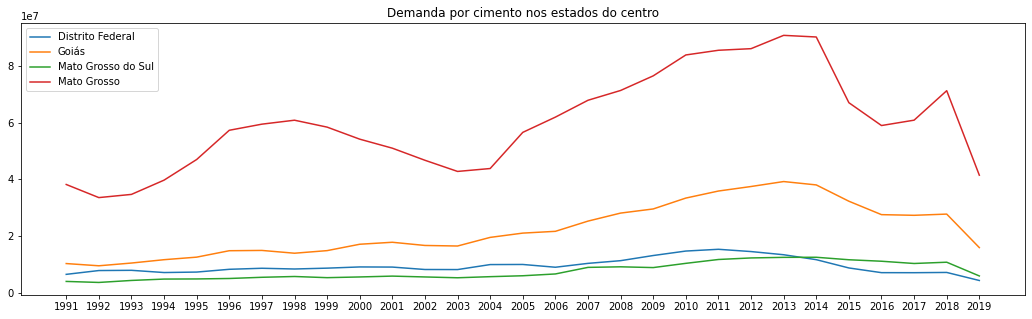

In [14]:
plt.figure(figsize=(18,5))
plt.title("Demanda por cimento nos estados do centro")

for i in range(len(centro)):

    plt.plot(anual[estados[centro[i]]], label=estados[centro[i]])

plt.legend()
plt.show()

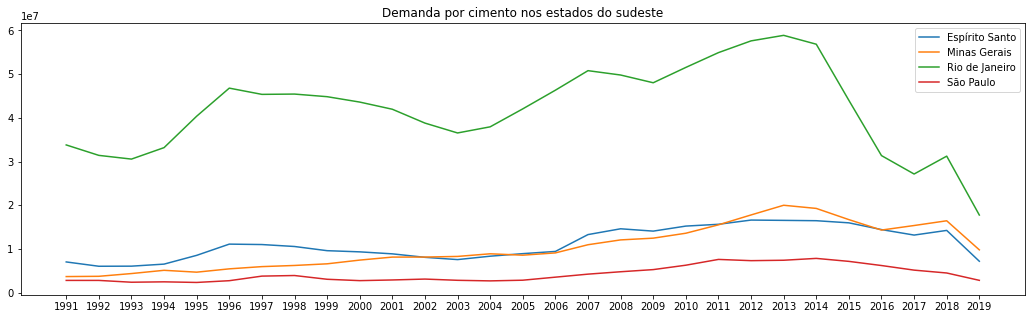

In [15]:
plt.figure(figsize=(18,5))
plt.title("Demanda por cimento nos estados do sudeste")

for i in range(len(sudeste)):

    plt.plot(anual[estados[sudeste[i]]], label=estados[sudeste[i]])

plt.legend()
plt.show()

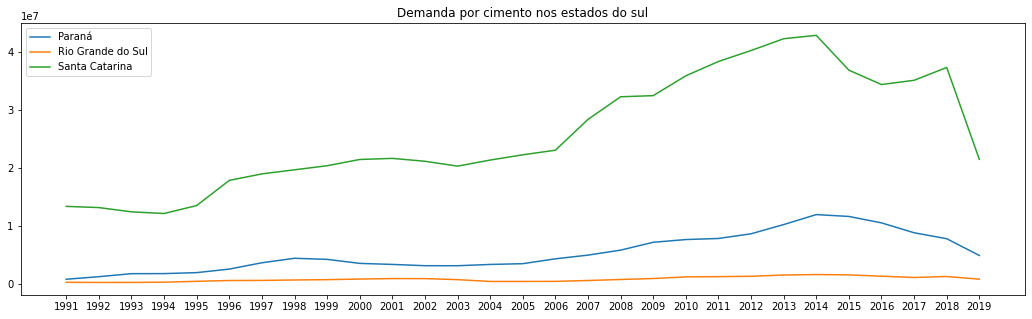

In [16]:
plt.figure(figsize=(18,5))
plt.title("Demanda por cimento nos estados do sul")

for i in range(len(sul)):

    plt.plot(anual[estados[sul[i]]], label=estados[sul[i]])

plt.legend()
plt.show()

In [52]:
from math import log

log_anual = pd.DataFrame(index=anos)

for col in anual.columns:

  log_anual[col] = list(anual[col].apply(log))

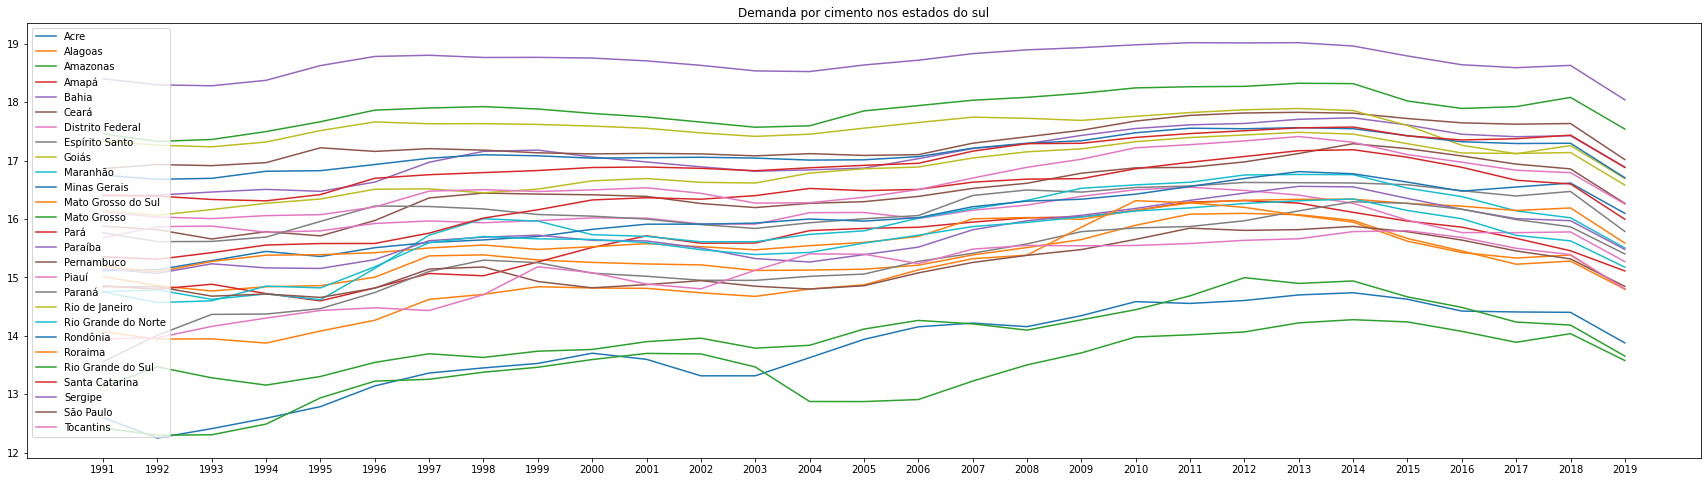

In [55]:
plt.figure(figsize=(30,8))
plt.title("Demanda por cimento nos estados do sul")

for i in range(27):

    plt.plot(log_anual[estados[i]], label=estados[i])

plt.legend()
plt.show()

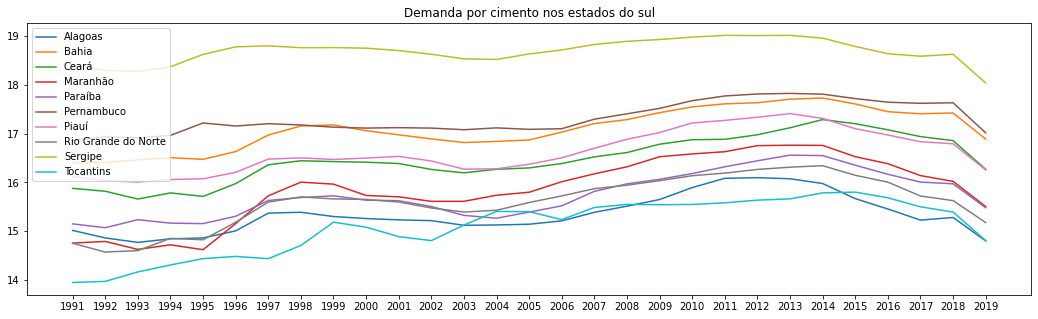

In [58]:
plt.figure(figsize=(18,5))
plt.title("Demanda por cimento nos estados do sul")

for i in range(len(nordeste)):

    plt.plot(log_anual[estados[nordeste[i]]], label=estados[nordeste[i]])

plt.legend()
plt.show()